In [64]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [65]:
!git clone https://github.com/defcom17/NSL_KDD

Cloning into 'NSL_KDD'...
remote: Enumerating objects: 15, done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (15/15), done.


In [66]:
cd NSL_KDD

/content/NSL_KDD/NSL_KDD


In [67]:
ls

'20 Percent Training Set.csv'   KDDTrain+_20Percent.txt
'Attack Types.csv'              KDDTrain+.csv
'Field Names.csv'               KDDTrain+.txt
'Field Names.docx'             'Original NSL KDD Zip.zip'
 KDDTest-21.txt                 ReadMe.txt
 KDDTest+.csv                  'Small Training Set.csv'
 KDDTest+.txt


In [68]:
Columns = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [69]:
data = pd.read_csv("KDDTrain+.csv", header=None, names = Columns)

In [70]:
data.shape

(125973, 43)

In [71]:
len(data.columns)

43

In [72]:
data.describe

<bound method NDFrame.describe of         duration protocol_type  ...    label difficulty
0              0           tcp  ...   normal         20
1              0           udp  ...   normal         15
2              0           tcp  ...  neptune         19
3              0           tcp  ...   normal         21
4              0           tcp  ...   normal         21
...          ...           ...  ...      ...        ...
125968         0           tcp  ...  neptune         20
125969         8           udp  ...   normal         21
125970         0           tcp  ...   normal         18
125971         0           tcp  ...  neptune         20
125972         0           tcp  ...   normal         21

[125973 rows x 43 columns]>

EDA

In [145]:
from pandas_profiling import ProfileReport

In [146]:
pd.__version__

'1.0.5'

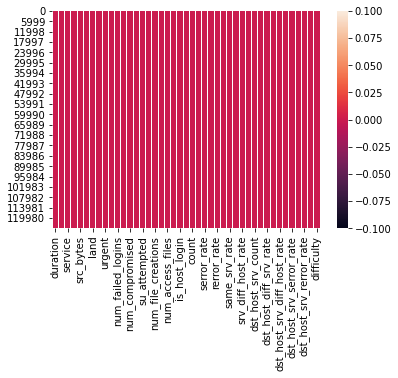

In [148]:
sns.heatmap(data.isnull())

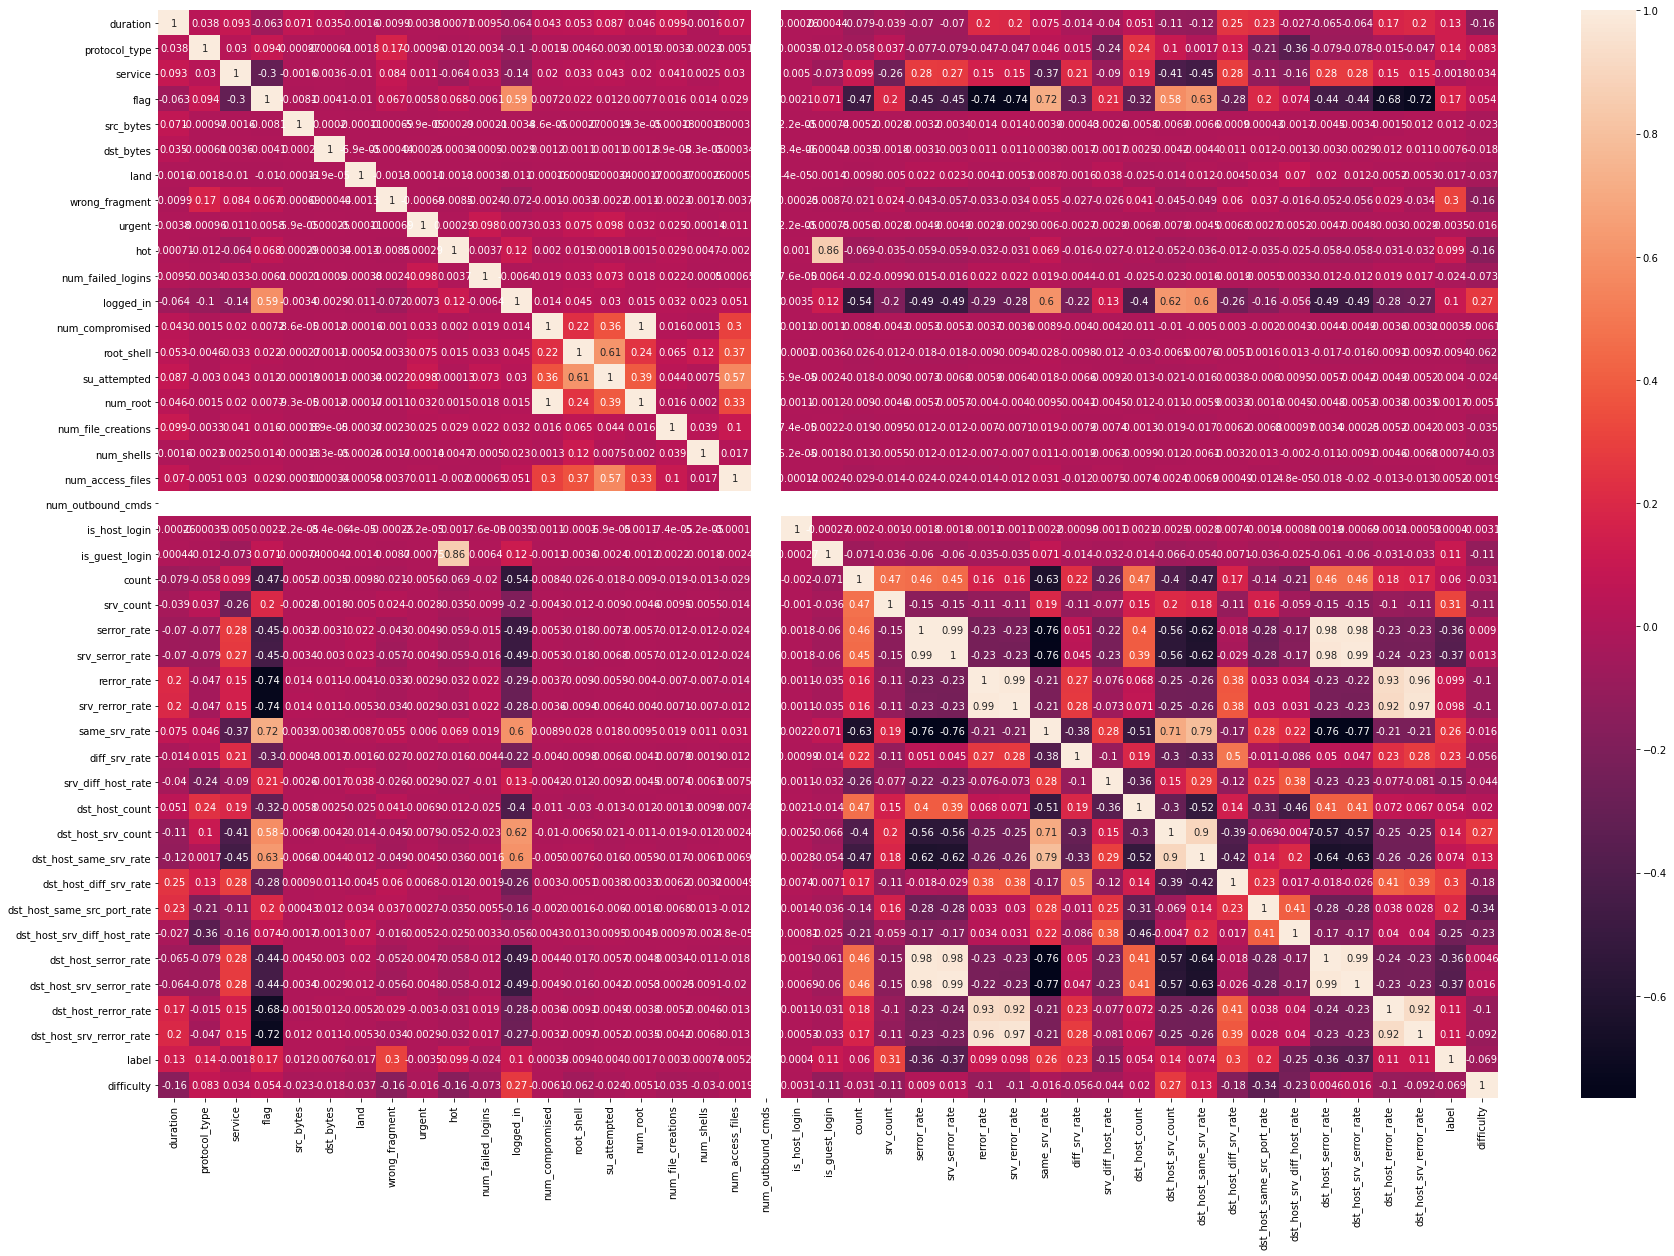

In [150]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)

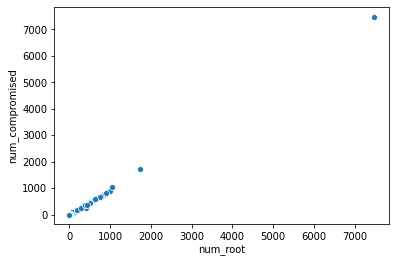

In [152]:
sns.scatterplot(x="num_root",y="num_compromised",data=data)

In [154]:
data[data["num_root"]>6000]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
59734,5328,1,60,9,1604,920608,0,0,0,2,0,1,7479,0,0,7468,2,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20,8,0.4,0.1,0.05,0.0,0.0,0.0,0.0,0.0,11,20


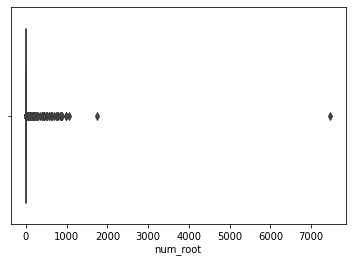

In [156]:
#we can clearly see an outlier 
sns.boxplot(data["num_root"])

In [158]:
#normal attack being the maximum
data["label"].value_counts()

11    67343
9     41214
17     3633
5      3599
15     2931
18     2646
10     1493
0       956
20      892
21      890
14      201
3        53
1        30
22       20
6        18
4        11
16       10
7         9
2         8
8         7
13        4
12        3
19        2
Name: label, dtype: int64

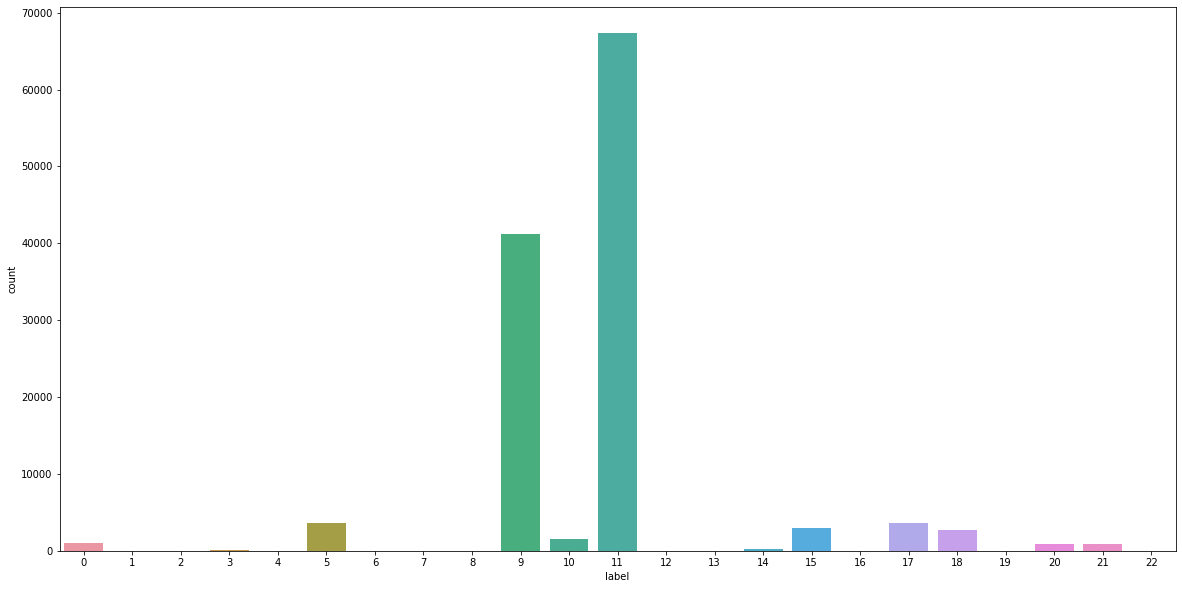

In [160]:
plt.figure(figsize=(20,10))
sns.countplot(data["label"])

In [73]:
import pandas_profiling

In [74]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['protocol_type'] = le.fit_transform(data['protocol_type'])
data['service'] = le.fit_transform(data['service'])
data['flag'] = le.fit_transform(data['flag'])
data['label'] = le.fit_transform(data['label'])

In [75]:
X = data.iloc[:,:-2]
y = data.iloc[:,-2]

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
score=rfc.score(X_test,y_test)

In [79]:
print(score*100)

99.86505258979956


In [80]:
ypred=rfc.predict(X_test)
confusion_matrix(ypred,y_test)

array([[  219,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     2,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,    11,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,   697,     0,     0,     0,
            0,     2,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  

In [81]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       0.99      1.00      1.00       699
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00      8361
          10       0.99      0.99      0.99       270
          11       1.00      1.00      1.00     13415
          14       1.00      0.98      0.99        43
          15       0.99      1.00      1.00       559
          17       0.99      1.00      1.00       743
          18       1.00      1.00      1.00       520
          19       0.00      0.00      0.00         0
          20       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
score=dtc.score(X_test,y_test)

In [84]:
print(score*100)

99.73804326255208


In [85]:
ypred=dtc.predict(X_test)
confusion_matrix(ypred,y_test)

array([[  219,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     3,     0,     0,     0,     0,     0,     0,     1,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,    11,     0,     0,     0,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     2,     0,     0,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,   697,     0,     0,     0,
            0,     3,     0,     0,     0,     0,     0,     0,     0

In [86]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       0.75      0.75      0.75         4
           2       0.00      0.00      0.00         0
           3       1.00      0.85      0.92        13
           4       1.00      0.50      0.67         4
           5       0.99      1.00      1.00       700
           6       0.25      1.00      0.40         1
           7       0.00      0.00      0.00         1
           8       0.50      0.50      0.50         2
           9       1.00      1.00      1.00      8363
          10       0.99      0.98      0.99       271
          11       1.00      1.00      1.00     13393
          14       1.00      0.95      0.98        44
          15       0.99      0.99      0.99       564
          16       0.00      0.00      0.00         2
          17       0.99      0.99      0.99       744
          18       1.00      1.00      1.00       520
          19       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
score=knc.score(X_test,y_test)

In [89]:
print(score*100)

98.53145465370113


In [90]:
ypred=knc.predict(X_test)
confusion_matrix(ypred,y_test)

array([[  215,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     2,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,    11,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,   670,     0,     0,     0,
            0,    93,     6,     0,     1,     2,     0,     0,     0,
            0,     0],
       [  

In [91]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       216
           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       0.96      0.87      0.91       772
           6       0.50      0.67      0.57         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       1.00      0.99      0.99      8406
          10       0.64      0.81      0.72       214
          11       0.99      1.00      1.00     13372
          14       1.00      0.88      0.93        48
          15       0.86      0.95      0.90       509
          17       0.95      0.93      0.94       763
          18       1.00      1.00      1.00       521
          19       0.00      0.00      0.00         0
          20       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
score=gnb.score(X_test,y_test)

In [94]:
print(score*100)

40.428656479460216


In [95]:
ypred=gnb.predict(X_test)
confusion_matrix(ypred,y_test)

array([[ 209,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    3,    0,    0,    0,    0,    0,    0,    1,    0,    0,
         265,    0,    0,    0,    0,    0,    0,    0,    0,   70,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         468,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          12,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
        3578,    0,    0,    7,    0,    1,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 

In [96]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       209
           1       0.75      0.01      0.02       340
           2       0.00      0.00      0.00       468
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00      3588
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00       932
           8       0.00      0.00      0.00         4
           9       1.00      0.52      0.68     16073
          10       0.00      0.00      0.00         0
          11       0.07      0.98      0.13       957
          13       0.00      0.00      0.00       158
          14       1.00      0.07      0.13       617
          15       0.24      0.65      0.35       210
          16       0.00      0.00      0.00       130
          17       0.00      0.00      0.00        68
          18       0.92    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
X=data.drop("label",axis=1)
y=data.label

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((100778, 42), (25195, 42), (100778,), (25195,))

In [100]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [101]:
X_train.protocol_type =lb.fit_transform(X_train["protocol_type"])
X_test.protocol_type =lb.transform(X_test["protocol_type"])
X_train.service = lb.fit_transform(X_train["service"])
X_test.service = lb.transform(X_test["service"])
X_train.flag = lb.fit_transform(X_train["flag"])
X_test.flag = lb.transform(X_test["flag"])
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [102]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
3048,0,1,24,9,251,313,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,7,0.0,0.0,0.0,0.0,1.00,0.00,0.43,37,255,1.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00,21
40123,0,1,24,9,265,178,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,139,255,1.00,0.00,0.01,0.03,0.01,0.01,0.01,0.01,21
56919,0,1,30,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,4,1.0,1.0,0.0,0.0,0.03,0.06,0.00,255,3,0.01,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20
86610,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,13,1.0,1.0,0.0,0.0,0.10,0.06,0.00,255,10,0.04,0.07,0.00,0.00,1.00,1.00,0.00,0.00,21
39363,0,1,24,9,199,2801,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,0.0,0.0,0.0,0.0,1.00,0.00,0.00,14,68,1.00,0.00,0.07,0.06,0.00,0.00,0.00,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0,1,18,9,6,309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,228,8,0.03,0.01,0.00,0.25,0.00,0.00,0.00,0.00,21
117952,0,1,24,9,293,5017,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,17,27,0.0,0.0,0.0,0.0,1.00,0.00,0.22,20,255,1.00,0.00,0.05,0.07,0.00,0.00,0.00,0.00,21
42613,4781,1,44,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,1.0,1.00,0.00,0.00,255,2,0.01,0.74,1.00,0.00,0.00,0.00,1.00,1.00,15
43567,0,1,54,9,1155,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,61,0.24,0.02,0.00,0.00,0.54,0.00,0.00,0.00,18


In [103]:
X_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
11224,0,1,24,9,206,3581,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.00,0.00,1.0,13,255,1.00,0.00,0.08,0.02,0.00,0.00,0.00,0.0,21
13951,0,1,24,9,239,2239,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,243,0.95,0.01,0.00,0.00,0.03,0.03,0.00,0.0,21
62642,0,1,54,9,1271,442,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,121,0.47,0.02,0.00,0.00,0.49,0.54,0.00,0.0,14
78373,0,1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,8,0.0,0.0,1.0,1.0,0.07,0.07,0.0,255,8,0.03,0.08,0.00,0.00,0.00,0.00,1.00,1.0,19
22304,0,2,49,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,1,0.0,0.0,0.0,0.0,0.05,0.14,0.0,255,1,0.00,0.90,0.11,0.00,0.13,0.00,0.76,0.0,17


In [104]:
y_train

array([11, 11,  9, ..., 15, 11, 11])

In [105]:
y_test

array([11, 11, 11, ..., 10,  9, 11])

In [106]:
from sklearn.model_selection import cross_val_predict,cross_val_score,KFold
import time

In [107]:
kfold=KFold(n_splits=5,shuffle=True,random_state=0)

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [109]:
score_lr=cross_val_score(lr,X_train,y_train,cv=kfold,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.3min finished


In [110]:
score_lr

array([0.84312364, 0.83429252, 0.82982735, 0.8355743 , 0.83393699])

In [111]:
st=time.time()
lr.fit(X_train,y_train)
et=time.time()
print("Training time:",et-st)

Training time: 81.09620141983032


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [112]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8321855960626328
0.8353641595554674


In [113]:
st=time.time()
ylr=lr.predict(X_test)
et=time.time()
print("Prediction time:",et-st)

Prediction time: 0.016736984252929688


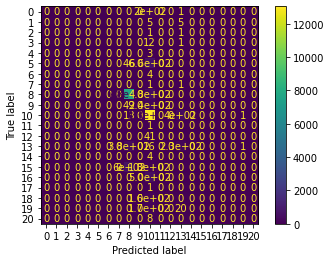

In [114]:
from sklearn.metrics import plot_confusion_matrix,classification_report

plot_confusion_matrix(lr,X_test,y_test)

In [117]:
np.bincount(y_test)

array([  196,    10,     2,    13,     3,   703,     4,     0,     2,
        8259,   292, 13457,     1,     0,    41,   624,     4,   723,
         505,     1,   161,   186,     8])

In [118]:
print(classification_report(y_test,ylr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00       703
           6       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.88      0.94      0.91      8259
          10       0.00      0.00      0.00       292
          11       0.83      0.97      0.90     13457
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        41
          15       0.34      0.36      0.35       624
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00       723
          18       0.00      0.00      0.00       505
          19       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
MISCLASSIFICATION=1-lr.score(X_test,y_test)
MISCLASSIFICATION

0.1646358404445326

In [128]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,ylr)

0.7016438183223588

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [130]:
lda=LinearDiscriminantAnalysis()

In [131]:
score_lda=cross_val_score(lda,X_train,y_train,cv=kfold,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s finished


In [132]:
score_lda

array([0.94994046, 0.9481544 , 0.95073427, 0.94988837, 0.94825105])

In [133]:
st=time.time()
lda.fit(X_train,y_train)
et=time.time()
print("Training Time:",et-st)

Training Time: 0.8923721313476562


In [134]:
print(lda.score(X_train,y_train))
print(lda.score(X_test,y_test))

0.9505745301553911
0.9505854336177814


In [135]:
lda.coef_

array([[-2.29679924e-04,  2.65874946e+00, -3.27257412e-03,
         1.86857500e+00, -1.67633511e-08, -2.34484674e-08,
        -6.46812511e+01, -8.41090503e+01, -9.13236443e+00,
         1.82721318e+00, -8.99725895e+00,  7.29530310e+00,
         1.11997315e+00, -6.65945145e+00,  1.52622530e+01,
        -1.11588885e+00, -5.90912325e-01, -3.19712994e+00,
         4.65859767e+00, -2.08262424e-13, -1.21430786e+01,
        -3.52576274e+01,  1.31428065e-02, -4.74375914e-02,
        -1.01728811e+01,  6.93159258e+00, -2.85458193e+01,
         4.99326792e+01,  1.42896748e+01,  1.20973107e+01,
         9.57849272e-01,  7.75728587e-03, -5.72399703e-02,
         2.44576885e+01,  1.34006590e+01, -3.96351496e+00,
         4.12257368e+00, -1.31913294e+01,  5.84893226e+00,
        -6.18466071e+00, -1.24130945e+01, -3.93775773e+00],
       [-5.09220463e-04,  5.36072711e+00,  1.42805138e-01,
         7.37203668e-01, -2.17512085e-08, -4.56639578e-08,
        -1.50825493e+02, -7.60782025e+01, -1.31336143e+

In [136]:
lda.intercept_

array([ 8.39351932e+00, -2.75779310e+02, -1.76210680e+02, -4.97736677e+02,
       -1.23245950e+02, -3.98497757e+01, -8.62426287e+03, -2.49141277e+02,
       -2.02709019e+02,  9.54347266e-01, -4.13526614e+01, -2.30800102e+01,
       -1.56303294e+03, -8.77759725e+02, -1.89226311e+03, -8.06900160e+01,
       -1.40740785e+02, -4.78714467e+00, -6.00151365e+01, -1.79351418e+03,
       -1.74046137e+04,  1.27332614e+01,  3.93037224e+00])

In [137]:
misclassificationlda=1-lda.score(X_test,y_test)
misclassificationlda

0.04941456638221864

In [138]:
st=time.time()
predlda=lda.predict(X_test)
et=time.time()
print("Prediction Time:",et-st)

Prediction Time: 0.019287586212158203


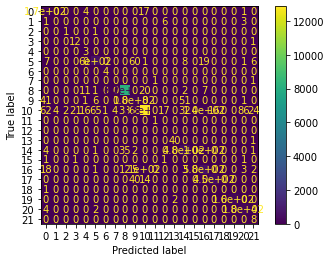

In [139]:
plot_confusion_matrix(lda,X_test,y_test)

In [140]:
print(classification_report(y_test,predlda))

              precision    recall  f1-score   support

           0       0.56      0.89      0.68       196
           1       0.00      0.00      0.00        10
           2       0.33      0.50      0.40         2
           3       0.35      0.92      0.51        13
           4       0.09      1.00      0.16         3
           5       0.89      0.85      0.87       703
           6       0.80      1.00      0.89         4
           8       0.00      0.00      0.00         2
           9       0.99      1.00      0.99      8259
          10       0.52      0.63      0.57       292
          11       0.99      0.96      0.97     13457
          12       0.50      1.00      0.67         1
          13       0.00      0.00      0.00         0
          14       0.95      0.98      0.96        41
          15       0.83      0.76      0.80       624
          16       0.00      0.00      0.00         4
          17       0.68      0.80      0.73       723
          18       0.97    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
cohen_kappa_score(y_test,predlda)

0.9193674659303122

In [115]:
from joblib import dump, load
dump(rfc, 'rfc.joblib')

['rfc.joblib']

In [116]:
import pickle
s = pickle.dumps(dtc)

  Accuracy:

1. Random Forest: 99.87%
2. Decision Tree: 99.81%
3. KNN          : 98.62%
4. Gaussian: 39.13%
5. Logistic:  83.21%
6. LDA: 95.05%